<center><h1>Mô tả bài toán</h1></center>

- Nhằm cải thiện, nâng cao chất lượng phục vụ hành khách. Giúp tìm ra những dịch vụ, những khâu còn hạn chế để đem đến sự hài lòng cho hành khách qua đó thu hút và giữ chân hành khách sử dụng dịch vụ bay của hãng mình.

- Hãng hàng không thực hiện một dự án về khai phá dữ liệu
(Data Mining), để xác định những dịch vụ mà hãng mình cung
cấp, hành khách phản hồi đánh giá mức độ hài lòng ra sao.

**CHI TIẾT BÀI TOÁN:**
Một hãng hàng không thực hiện khảo sát khách hàng đánh giá về các dịch vụ của hãng bay; với 2 nhóm dữ liệu

<img src = 'Pic/Airline.png' width='600px'>

**A. Các thông tin chung của hành khách và chuyến bay: Dữ liệu được lưu trữ trong file CSV**
1. Code: Mã hành khách
2. Gender: Giới tính của hành khách (Male|Female)
3. Customer Type: Loại hành khách. 
    * Khách hàng thân thiết (Loyal Customer): Khách hàng đã đi nhiều lần (>=2) với hãng
    * Khách hàng không thân thiết (disloyal Customer): Khách hàng không thân thiết (sử dụng dịch vụ bay lần đầu của hãng)
4. Age: Tuổi của hành khách
5. State: Địa chỉ của hành khách
5. Type of Travel: Mục đích đi máy bay
    * Đi với mục đích công việc (Business travel)
    * Đi với mục đích cá nhân (Personal Travel)
6. Class: Loại vé (Business | Eco Plus | Eco)
7. Flight Distance: Khoảng cách di chuyển của chuyến bay (Mile)
8. Departure Delay in Minutes: Thời gian trễ của chuyến bay tại ga xuất phát (Phút)
9. Arrival Delay in Minutes: Thời gian trễ của chuyến bay tại ga đến (phút)

<img src = 'Pic/feedback.jpg' width='600px'>

**B. Chiến dịch khảo sát được thực hiện trong suốt 12 tháng trong năm 2020, dữ liệu được lưu trong file Excel với từng sheet tương ứng là dữ liệu khảo sát trong từng tháng:** Thang chấm từ 0 (thấp nhất)  --> 5 (cao nhất)

1. Code: Mã khách hàng
2. Inflight wifi service: Dịch vụ wifi trên chuyến bay
3. Departure/Arrival time convenient: Mức độ thuận tiện trong thời gian ở Ga khởi hành| Ga đến
4. Ease of Online booking: Mức độ dễ đàng khi đặt vé Online
5. Food and drink: Đồ ăn và đồ uống phục vụ trên chuyến bay
6. Seat comfort: Sự thoải mái của chỗ ngồi
7. Inflight entertainment: Dịch vụ giải trí trên chuyến bay
8. Baggage handling: Vấn đề liên quan đến hành lý xách tay
9. Checkin service: Dịch vụ checkin
10. Inflight service: Dịch vụ trên chuyến bay
11. Cleanliness: Vệ sinh trên chuyến bay
12. satisfaction: Tổng quan chung về mức độ hài lòng.
    * KHÔNG HÀI LÒNG với chuyến bay (neutral or dissatisfied)
    * HÀI LÒNG với chuyến bay (satisfied)

## 1. Tích hợp dữ liệu
---
Dữ liệu liên quan đến dự án đang được lưu trữ ở 2 file với 2 định dạng khác nhau Ta tích hợp 2 file dữ liệu thành 1 file dữ liệu duy nhất (Dataset) để phục vụ cho việc phân tích. 

In [1]:
#Gọi các thư viện sử dụng:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------------------------
import warnings
warnings.filterwarnings('ignore')

### Đọc dữ liệu 1 Data_Passenger_Airlines.csv

In [2]:
#Đọc dữ liệu
data_passenger = pd.read_csv('Data/Data_Passenger_Airlines.csv')

In [3]:
#Hiển thị 5 bản ghi đầu tiên
data_passenger.head(5)

,Code,Gender,Customer Type,Age,State,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,WX02553023,Male,Loyal Customer,13.0,NaN,Personal Travel,Eco Plus,460.0,25.0,18.0
1,QS99844747,Male,Disloyal Customer,25.0,GA,Business travel,Business,235.0,1.0,6.0
2,OL00432935,Female,Loyal Customer,26.0,NaN,Business travel,Business,1142.0,0.0,0.0
3,CM55347278,Female,Loyal Customer,25.0,NaN,Business travel,Business,562.0,11.0,9.0
4,TZ46480191,Male,Loyal Customer,61.0,NaN,Business travel,Business,214.0,0.0,0.0


In [4]:
#Hiển thị 5 bản ghi cuối cùng
data_passenger.tail(5)

,Code,Gender,Customer Type,Age,State,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
129874,FT08787333,Male,Disloyal Customer,34.0,NaN,Business travel,Business,526.0,0.0,0.0
129875,PO34507015,Male,Loyal Customer,23.0,NaN,Business travel,Business,646.0,0.0,0.0
129876,ZI79990801,Female,Loyal Customer,17.0,NaN,Personal Travel,Eco,828.0,0.0,0.0
129877,TN82785469,Male,Loyal Customer,14.0,NaN,Business travel,Business,1127.0,0.0,0.0
129878,QY90921876,Female,Loyal Customer,42.0,NaN,Personal Travel,Eco,264.0,0.0,0.0


In [5]:
#Hiển thị 5 bản ghi ngẫu nhiên
data_passenger.sample(5)

,Code,Gender,Customer Type,Age,State,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
16329,KS02361191,Female,Loyal Customer,23.0,NaN,Business travel,Business,1742.0,0.0,14.0
32510,PC38308952,Male,Loyal Customer,49.0,GA,Business travel,Business,594.0,0.0,0.0
127298,GF79308122,Male,Disloyal Customer,32.0,NaN,Business travel,Business,872.0,9.0,16.0
54790,HH57105042,Male,Disloyal Customer,22.0,MA,Business travel,Eco,861.0,0.0,0.0
85626,UX60090758,Male,Loyal Customer,49.0,VA,Business travel,Business,221.0,0.0,0.0


In [6]:
#Hiển thị thông tin dữ liệu
data_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129879 entries, 0 to 129878
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Code                        129879 non-null  object 
 1   Gender                      129877 non-null  object 
 2   Customer Type               129877 non-null  object 
 3   Age                         129877 non-null  float64
 4   State                       59110 non-null   object 
 5   Type of Travel              129877 non-null  object 
 6   Class                       129877 non-null  object 
 7   Flight Distance             129877 non-null  float64
 8   Departure Delay in Minutes  129877 non-null  float64
 9   Arrival Delay in Minutes    129486 non-null  float64
dtypes: float64(4), object(6)
memory usage: 9.9+ MB


### Đọc dữ liệu 2 Data_Feedback_Month.xlsx

In [7]:
# Đọc tất cả các sheet và gộp lại thành một dataset
data_feedback = pd.concat([pd.read_excel('Data/Data_Feedback_Month.xlsx', sheet_name=i) for i in range(12)])
data_feedback.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 8879
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Code                               129880 non-null  object 
 1   Inflight wifi service              129877 non-null  float64
 2   Departure/Arrival time convenient  129877 non-null  float64
 3   Ease of Online booking             129877 non-null  float64
 4   Food and drink                     129877 non-null  float64
 5   Seat comfort                       129877 non-null  float64
 6   Inflight entertainment             129877 non-null  float64
 7   Baggage handling                   129877 non-null  float64
 8   Checkin service                    129877 non-null  float64
 9   Inflight service                   129877 non-null  float64
 10  Cleanliness                        129877 non-null  float64
 11  satisfaction                       129877 non-

In [8]:
#Hiển thị 5 bản ghi đầu tiên
data_feedback.head(5)

,Code,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,WV52397169,4.0,4.0,4.0,3.0,0.0,3.0,1.0,1.0,5.0,5.0,neutral or dissatisfied
1,JQ94282298,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,2.0,satisfied
2,VQ26320958,0.0,0.0,0.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,satisfied
3,NO22444367,2.0,2.0,2.0,3.0,0.0,3.0,2.0,0.0,5.0,5.0,neutral or dissatisfied
4,AS16096894,2.0,2.0,3.0,4.0,5.0,2.0,2.0,4.0,2.0,3.0,satisfied


In [9]:
#Hiển thị 5 bản ghi cuối cùng
data_feedback.tail(5)

,Code,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
8875,FT08787333,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,neutral or dissatisfied
8876,PO34507015,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,satisfied
8877,ZI79990801,2.0,5.0,1.0,2.0,2.0,2.0,4.0,5.0,4.0,2.0,neutral or dissatisfied
8878,TN82785469,3.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,satisfied
8879,QY90921876,2.0,5.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,neutral or dissatisfied


In [10]:
#Hiển thị 5 bản ghi ngẫu nhiên
data_feedback.sample(5)

,Code,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
1141,SW39016329,1.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0,satisfied
1962,YV38343862,2.0,5.0,5.0,0.0,4.0,2.0,2.0,1.0,2.0,5.0,neutral or dissatisfied
10516,DW05154577,4.0,4.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,4.0,satisfied
6569,WP00714115,0.0,4.0,3.0,0.0,4.0,2.0,2.0,0.0,2.0,0.0,neutral or dissatisfied
4498,OQ28416112,2.0,3.0,3.0,2.0,2.0,2.0,1.0,4.0,5.0,2.0,neutral or dissatisfied


In [11]:
#Hiển thị thông tin dữ liệu
data_feedback.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 8879
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Code                               129880 non-null  object 
 1   Inflight wifi service              129877 non-null  float64
 2   Departure/Arrival time convenient  129877 non-null  float64
 3   Ease of Online booking             129877 non-null  float64
 4   Food and drink                     129877 non-null  float64
 5   Seat comfort                       129877 non-null  float64
 6   Inflight entertainment             129877 non-null  float64
 7   Baggage handling                   129877 non-null  float64
 8   Checkin service                    129877 non-null  float64
 9   Inflight service                   129877 non-null  float64
 10  Cleanliness                        129877 non-null  float64
 11  satisfaction                       129877 non-

### Gộp 2 data thành 1 dataset với dữ liệu chung là cột Code

In [12]:
#Gộp 2 data thành 1
data = pd.merge(data_passenger, data_feedback, left_on='Code', right_on='Code')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129882 entries, 0 to 129881
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Code                               129882 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  float64
 4   State                              59110 non-null   object 
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  float64
 8   Departure Delay in Minutes         129880 non-null  float64
 9   Arrival Delay in Minutes           129489 non-null  float64
 10  Inflight wifi service              129879 non-null  float64
 11  Departure/Arrival time convenient  1298

**Mô tả dữ liệu sau khi gộp**
1. Code: Mã hành khách
2. Gender: Giới tính của hành khách (Male|Female)
3. Customer Type: Loại hành khách. 
    * Khách hàng thân thiết (Loyal Customer): Khách hàng đã đi nhiều lần (>=2) với hãng
    * Khách hàng không thân thiết (disloyal Customer): Khách hàng không thân thiết (sử dụng dịch vụ bay lần đầu của hãng)
4. Age: Tuổi của hành khách
5. State: Địa chỉ của hành khách
6. Type of Travel: Mục đích đi máy bay
    * Đi với mục đích công việc (Business travel)
    * Đi với mục đích cá nhân (Personal Travel)
7. Class: Loại vé (Business | Eco Plus | Eco)
8. Flight Distance: Khoảng cách di chuyển của chuyến bay (Mile)
9. Departure Delay in Minutes: Thời gian trễ của chuyến bay tại ga xuất phát (Phút)
10. Arrival Delay in Minutes: Thời gian trễ của chuyến bay tại ga đến (phút)
11. Inflight wifi service: Dịch vụ wifi trên chuyến bay
12. Departure/Arrival time convenient: Mức độ thuận tiện trong thời gian ở Ga khởi hành| Ga đến
13. Ease of Online booking: Mức độ dễ đàng khi đặt vé Online
14. Food and drink: Đồ ăn và đồ uống phục vụ trên chuyến bay
15. Seat comfort: Sự thoải mái của chỗ ngồi
16. Inflight entertainment: Dịch vụ giải trí trên chuyến bay
17. Baggage handling: Vấn đề liên quan đến hành lý xách tay
18. Checkin service: Dịch vụ checkin
19. Inflight service: Dịch vụ trên chuyến bay
20. Cleanliness: Vệ sinh trên chuyến bay
21. satisfaction: Tổng quan chung về mức độ hài lòng.
    * KHÔNG HÀI LÒNG với chuyến bay (neutral or dissatisfied)
    * HÀI LÒNG với chuyến bay (satisfied)

## 2. Xác định các loại dữ liệu của các thuộc tính
---
Từ các thuộc tính trong Dataset đã tích hợp, xác định loại dữ liệu tương ứng cho từng thuộc tính:
* Dữ liệu định tính:
    - Định danh
    - Nhị phân
    - Trật tự
* Dữ liệu định lượng:
    - Rời rạc 
    - Liên tục

1. Trong Dataset các thuộc tính có kiểu dữ liệu định tính (Qualitative Data):

    1.1 Định tính/Định Danh (Nominal Data)

        - Code
        - State


    1.2 Định tính/Nhị Phân (Binary Data)

        - Gender
        - Customer Type 
        - Type of Travel
        - Satisfaction


    1.3 Định tính/Trật tự (Ordinal Data)

        -   Class
        -   Inflight wifi service
        -   Departure/Arrival time convenient
        -   Ease of Online booking
        -   Food and drink
        -   Seat comfort
        -   Inflight entertainment
        -   Baggage handling
        -   Checkin service
        -   Inflight service
        -   Cleanliness


2. Trong Dataset các thuộc tính có kiểu dữ liệu định lượng (Quantitative Data):

   2.1 Định lượng/Rời rạc (Discrete Data) 
   
       - Age
       - Flight Distance


   2.2 Định lượng/Liên tục (Continuous Data)

       -Departure Delay in Minutes
       -Arrival Delay in Minutes



## 3. Khám phá để hiểu tập dữ liệu (Understanding)
---

Các thuộc tính trong Dataset đã tích hợp, xác định các đặc trưng thống kê:

* Với các thuộc tính dữ liệu định lượng: Xác định các tham số Min, Max, Mean, Median, standard deviation (std),
* Với các thuộc tính dữ liệu định tính: Xác định số lượng theo từng giá trị và tỷ lệ % tương ứng với các giá trị của mỗi thuộc tính
* Hệ số tương quan:
    1. Xác định hệ số tương quan (r) của 2 thuộc tính: Flight Distance ~ Departure Delay in Minutes, vẽ biểu đồ thể hiện sự tương quan; từ hệ số r và biểu đồ đưa ra nhận xét về mức độ tương quan của 2 thuộc tính này.
    2. Xác định hệ số tương quan (r) của 2 thuộc tính: Departure Delay in Minutes ~ Arrival Delay in Minutes, vẽ biểu đồ thể hiện sự tương quan; từ hệ số r và biểu đồ đưa ra nhận xét về mức độ tương quan của 2 thuộc tính này.

### Xác định các tham số Min, Max, Mean, Median, standard deviation (std) cho các thuộc tính dữ liệu định lượng

In [13]:
#Tổng quan dữ liệu
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.443140,16.058972,7.0,27.0,40.0,51.0,1990.0
Flight Distance,129880.0,1190.299122,997.429725,31.0,414.0,844.0,1744.0,4983.0
Departure Delay in Minutes,129880.0,14.713967,38.071089,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,129489.0,15.089591,38.466948,-100.0,0.0,0.0,13.0,1584.0
Inflight wifi service,129879.0,2.386860,1.551949,0.0,1.0,2.0,4.0,5.0
Departure/Arrival time convenient,129879.0,3.057631,1.526746,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129879.0,2.757182,1.407816,0.0,2.0,3.0,4.0,50.0
Food and drink,129879.0,2.571686,1.568008,0.0,1.0,3.0,4.0,5.0
Seat comfort,129879.0,3.281046,1.528842,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129879.0,3.358002,1.334080,0.0,2.0,4.0,4.0,5.0


In [14]:
#Hàm hiển thị các giá trị cơ bản
def basic_info(dataset):
    print(f'Các đặc trưng thống kê thuộc tính', dataset.name)
    print('Giá trị nhỏ nhất  : ',dataset.min())
    print('Giá trị lớn nhất  : ',dataset.max())
    print('Giá trị trung bình: ',dataset.mean())
    print('Giá trị trung vị  : ',dataset.median())
    print('Độ lệch chuẩn     : ',dataset.std())

In [15]:
#Các đặc trưng thống kê của Age
basic_info(data['Age'])

Các đặc trưng thống kê thuộc tính Age
Giá trị nhỏ nhất  :  7.0
Giá trị lớn nhất  :  1990.0
Giá trị trung bình:  39.44313982137358
Giá trị trung vị  :  40.0
Độ lệch chuẩn     :  16.058972294234984


In [16]:
#Các đặc trưng thống kê của Flight Distance
basic_info(data['Flight Distance'])

Các đặc trưng thống kê thuộc tính Flight Distance
Giá trị nhỏ nhất  :  31.0
Giá trị lớn nhất  :  4983.0
Giá trị trung bình:  1190.2991222667076
Giá trị trung vị  :  844.0
Độ lệch chuẩn     :  997.4297251742659


In [17]:
#Các đặc trưng thống kê của Departure Delay in Minutes
basic_info(data['Departure Delay in Minutes'])

Các đặc trưng thống kê thuộc tính Departure Delay in Minutes
Giá trị nhỏ nhất  :  0.0
Giá trị lớn nhất  :  1592.0
Giá trị trung bình:  14.713966738527873
Giá trị trung vị  :  0.0
Độ lệch chuẩn     :  38.07108878928232


In [18]:
#Các đặc trưng thống kê của Arrival Delay in Minutes
basic_info(data['Arrival Delay in Minutes'])

Các đặc trưng thống kê thuộc tính Arrival Delay in Minutes
Giá trị nhỏ nhất  :  -100.0
Giá trị lớn nhất  :  1584.0
Giá trị trung bình:  15.089590621597202
Giá trị trung vị  :  0.0
Độ lệch chuẩn     :  38.466947566372745


**Nhận xét**
 - Có các giá trị ngoại lai: Max thuộc tính Age = 1990, Arrival Delay in Minutes = -100, Ease of Online booking = 50

### Xác định số lượng theo từng giá trị và tỷ lệ % tương ứng vớc các giá trị của các dữ liệu định tính

In [19]:
#Tổng quan dữ liệu
data.describe(include='O').T

,count,unique,top,freq
Code,129882,129878,CD24961940,4
Gender,129880,2,Female,65900
Customer Type,129880,2,Loyal Customer,106100
State,59110,43,NJ,4587
Type of Travel,129880,2,Business travel,89690
Class,129880,3,Business,62158
satisfaction,129879,2,neutral or dissatisfied,73454


In [20]:
#Khai báo hàm hiển thị số lượng các giá trị của thuộc tính và % 
def tt(dataset):
    #Hiển thị số lượng các giá trị của thuộc tính
    gia_tri = dataset.value_counts()
    print('Số lượng các giá trị của thuộc tính', gia_tri)
    #Tỉ lệ % số lượng phần tử
    tile = dataset.value_counts(normalize=True)
    print('Tỉ lệ % số lượng phần tử', tile)
   #Vẽ biểu đồ
   #Trực quan hóa dữ liệu: 
    #Biểu đồ cột
    plt.figure(figsize=(18,10))
    plt.subplot(1,2,1)
    plt.bar(gia_tri.index,gia_tri.values,color = 'skyblue')
    plt.grid(ls='--')
    plt.title(f'Số lượng các giá trị của thuộc tính {dataset.name}')
    #Biểu đồ tròn
    plt.subplot(1,2,2)
    plt.pie(gia_tri.values,
            labels = gia_tri.index,
            autopct='%.1f%%')
    plt.title(f'Tỉ lệ % số lượng phần tử của thuộc tính {dataset.name}')
    plt.show()

#### Thuộc tính Gender

Số lượng các giá trị của thuộc tính Gender
Female    65900
Male      63980
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Gender
Female    0.507391
Male      0.492609
Name: proportion, dtype: float64


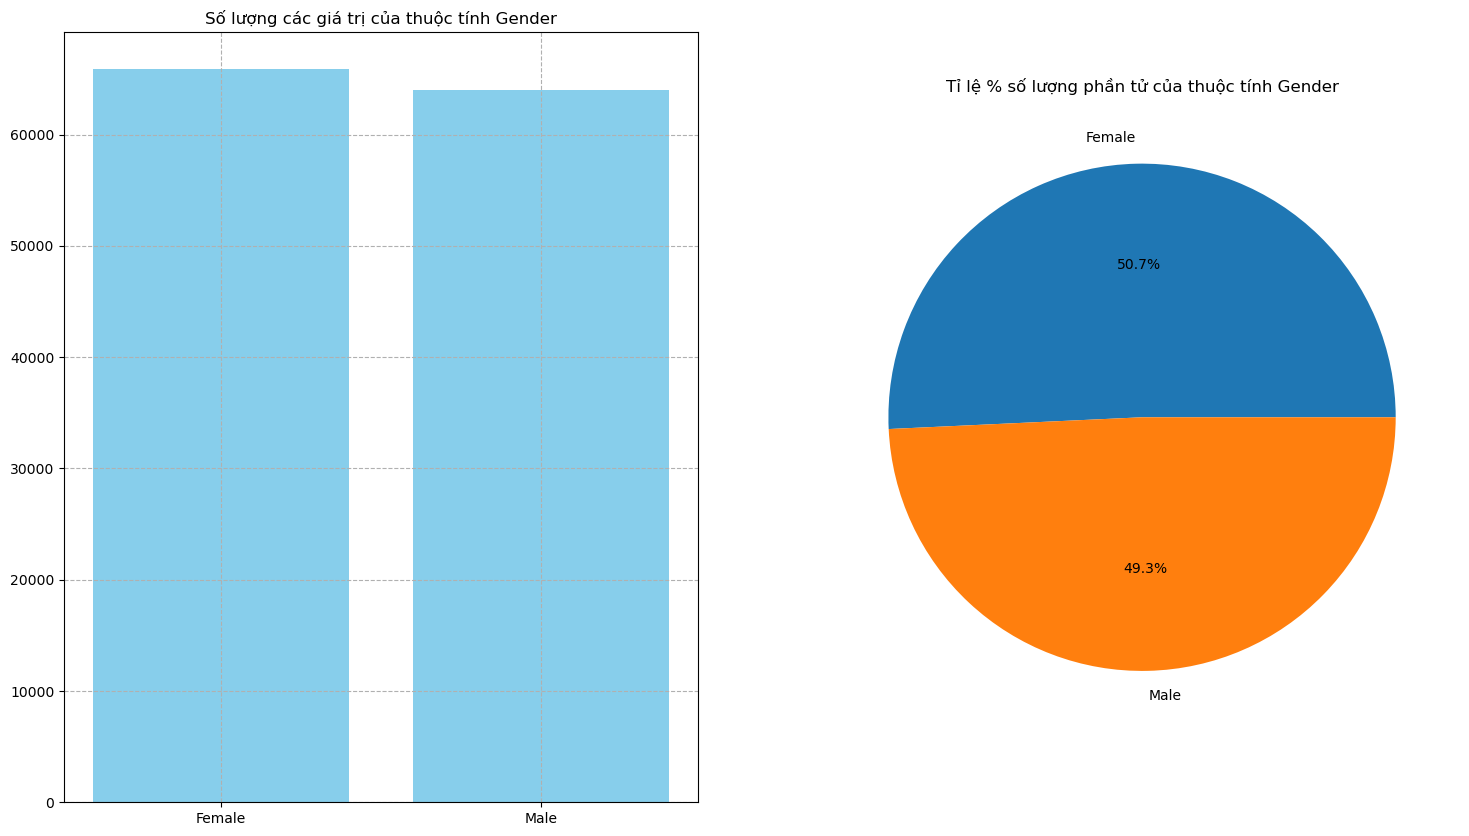

In [21]:
#Hiển thị số lượng và % các giá trị
tt(data['Gender'])

#### Thuộc tính Customer Type 

Số lượng các giá trị của thuộc tính Customer Type
Loyal Customer       106100
Disloyal Customer     23780
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Customer Type
Loyal Customer       0.816908
Disloyal Customer    0.183092
Name: proportion, dtype: float64


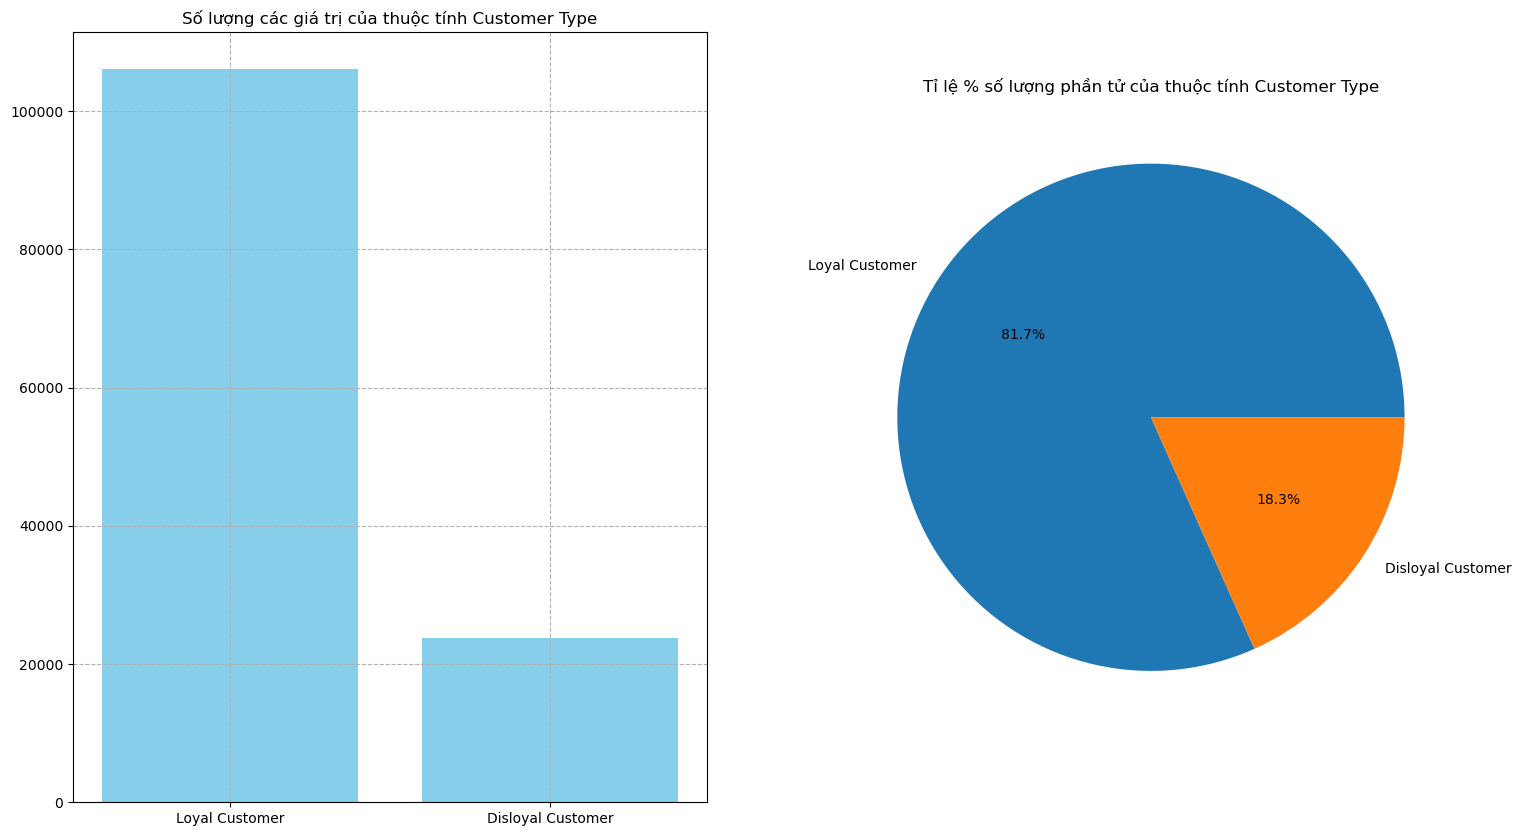

In [22]:
#Hiển thị số lượng và % các giá trị
tt(data['Customer Type'])

#### Thuộc tính Type of Travel

Số lượng các giá trị của thuộc tính Type of Travel
Business travel    89690
Personal Travel    40190
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Type of Travel
Business travel    0.690561
Personal Travel    0.309439
Name: proportion, dtype: float64


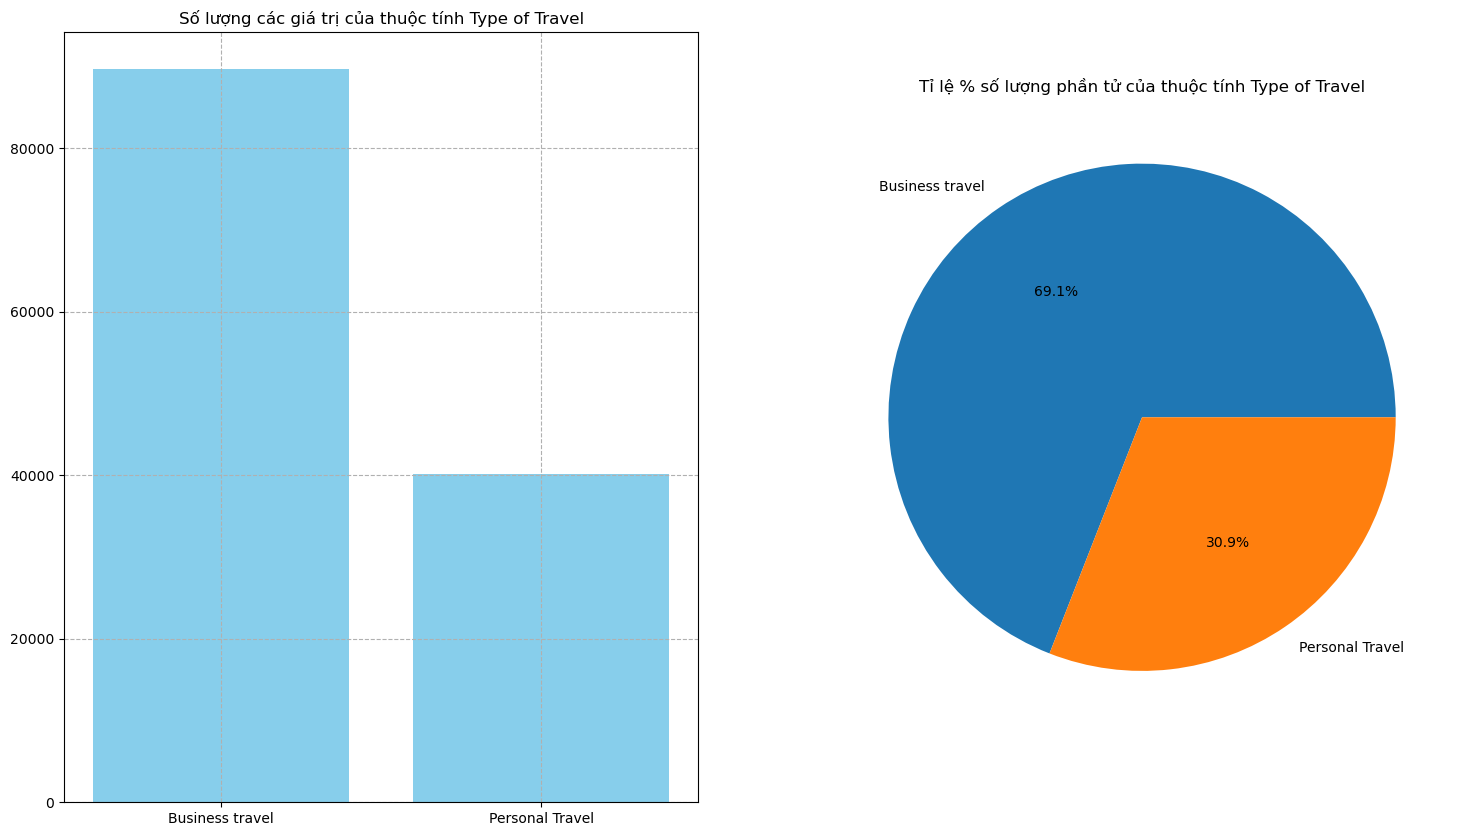

In [23]:
#Hiển thị số lượng và % các giá trị
tt(data['Type of Travel'])

#### Thuộc tính Satisfaction

Số lượng các giá trị của thuộc tính satisfaction
neutral or dissatisfied    73454
satisfied                  56425
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử satisfaction
neutral or dissatisfied    0.565557
satisfied                  0.434443
Name: proportion, dtype: float64


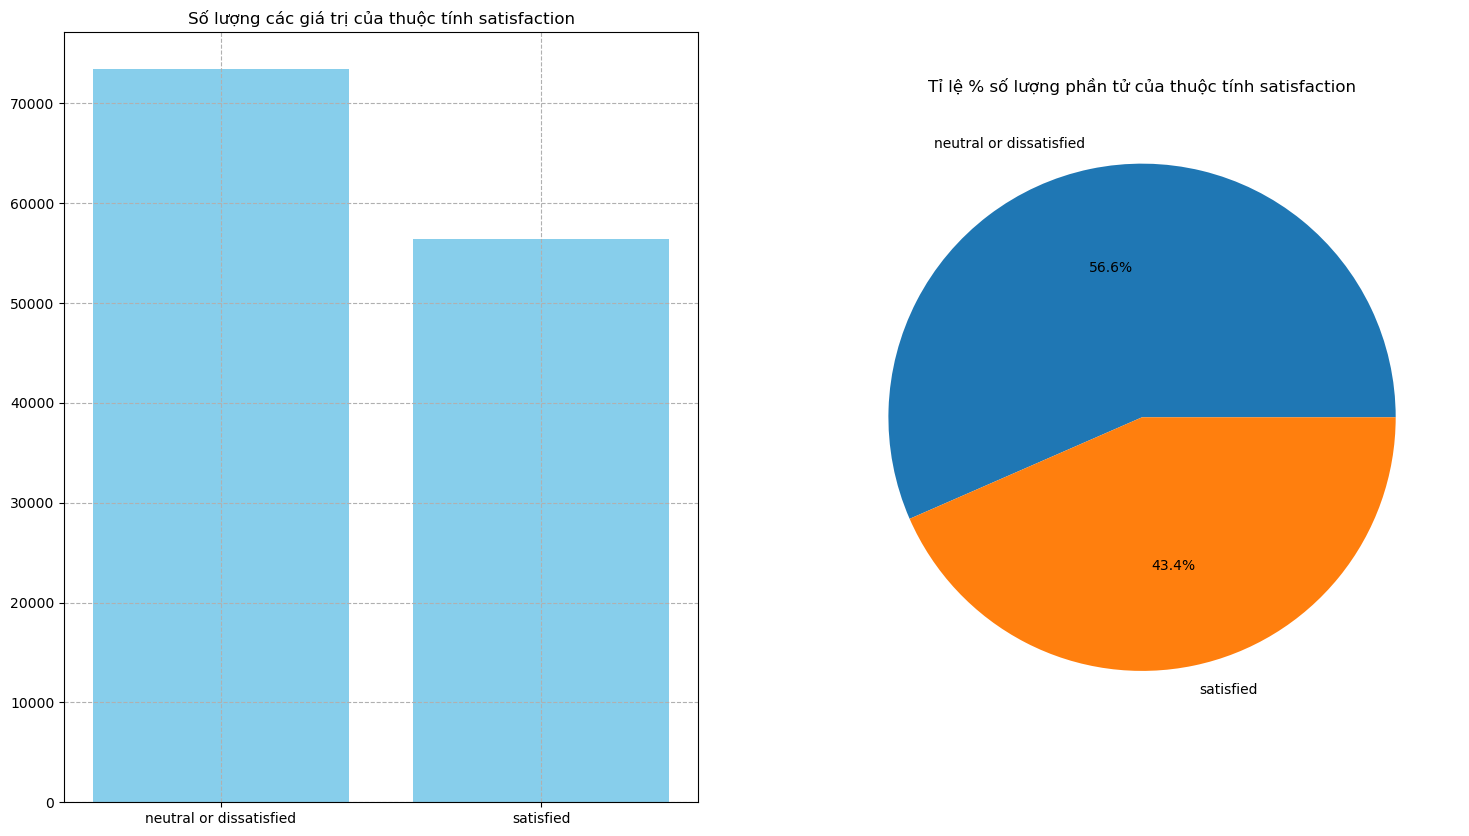

In [24]:
#Hiển thị số lượng và % các giá trị
tt(data['satisfaction'])

#### Thuộc tính Class

Số lượng các giá trị của thuộc tính Class
Business    62158
Eco         58311
Eco Plus     9411
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Class
Business    0.478580
Eco         0.448961
Eco Plus    0.072459
Name: proportion, dtype: float64


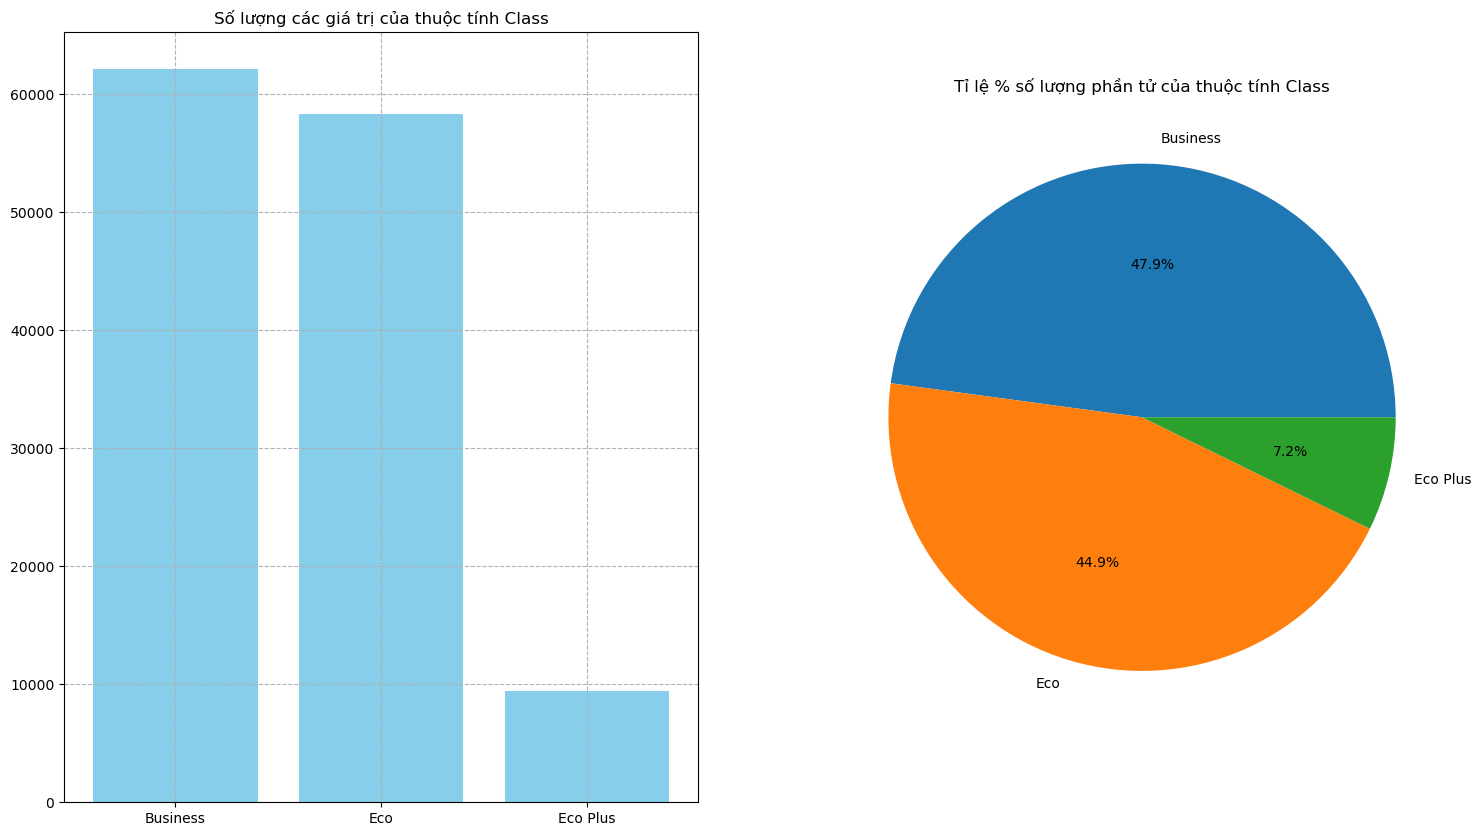

In [25]:
#Hiển thị số lượng và % các giá trị
tt(data['Class'])

#### Thuộc tính Inflight wifi service

Số lượng các giá trị của thuộc tính Class
Business    62158
Eco         58311
Eco Plus     9411
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Class
Business    0.478580
Eco         0.448961
Eco Plus    0.072459
Name: proportion, dtype: float64


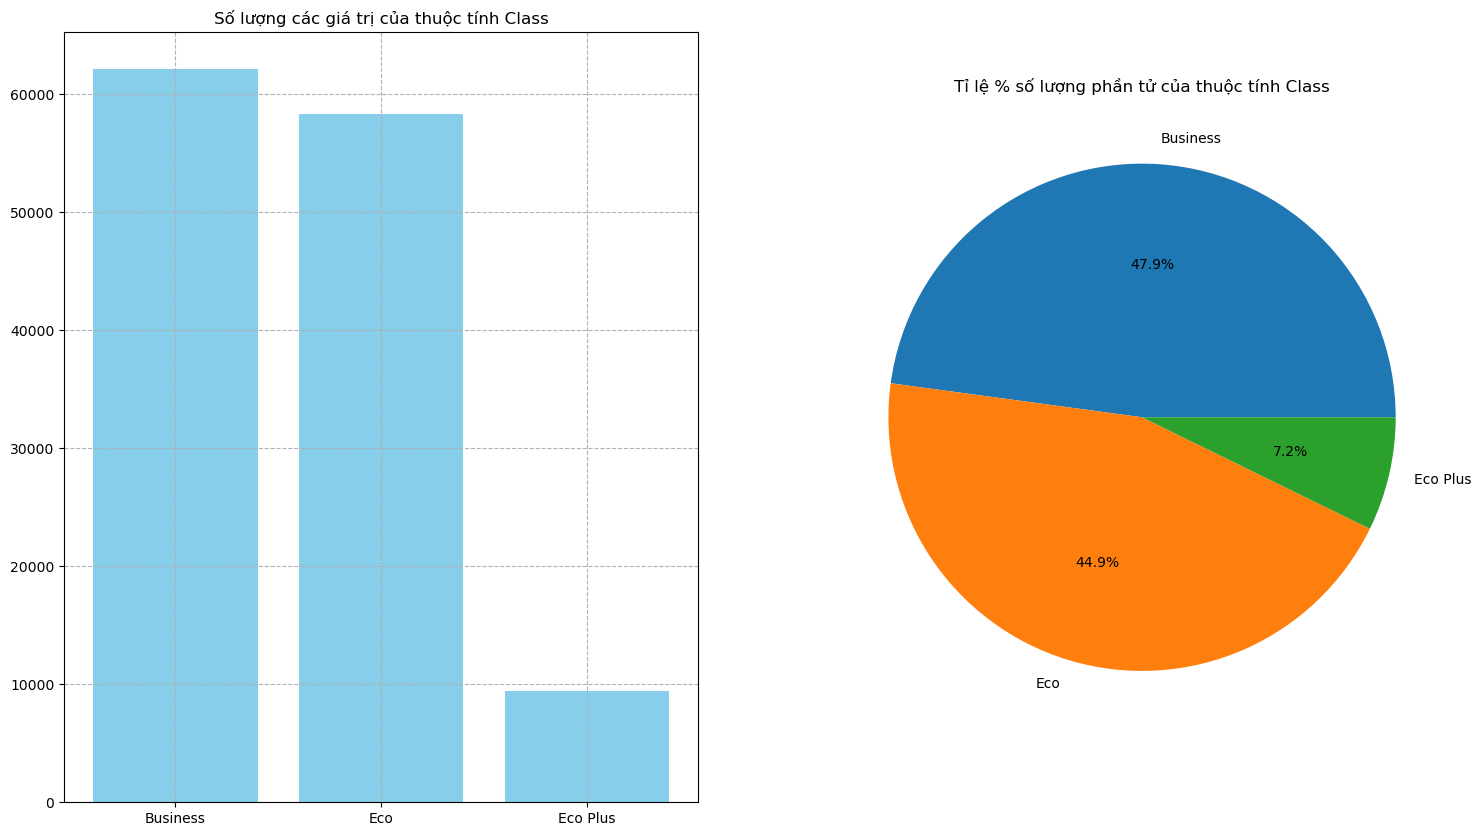

In [26]:
#Hiển thị số lượng và % các giá trị
tt(data['Class'])

#### Thuộc tính Departure/Arrival time convenient

Số lượng các giá trị của thuộc tính Departure/Arrival time convenient
4.0    31880
5.0    27999
3.0    22377
2.0    21534
1.0    19408
0.0     6681
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Departure/Arrival time convenient
4.0    0.245459
5.0    0.215578
3.0    0.172291
2.0    0.165800
1.0    0.149431
0.0    0.051440
Name: proportion, dtype: float64


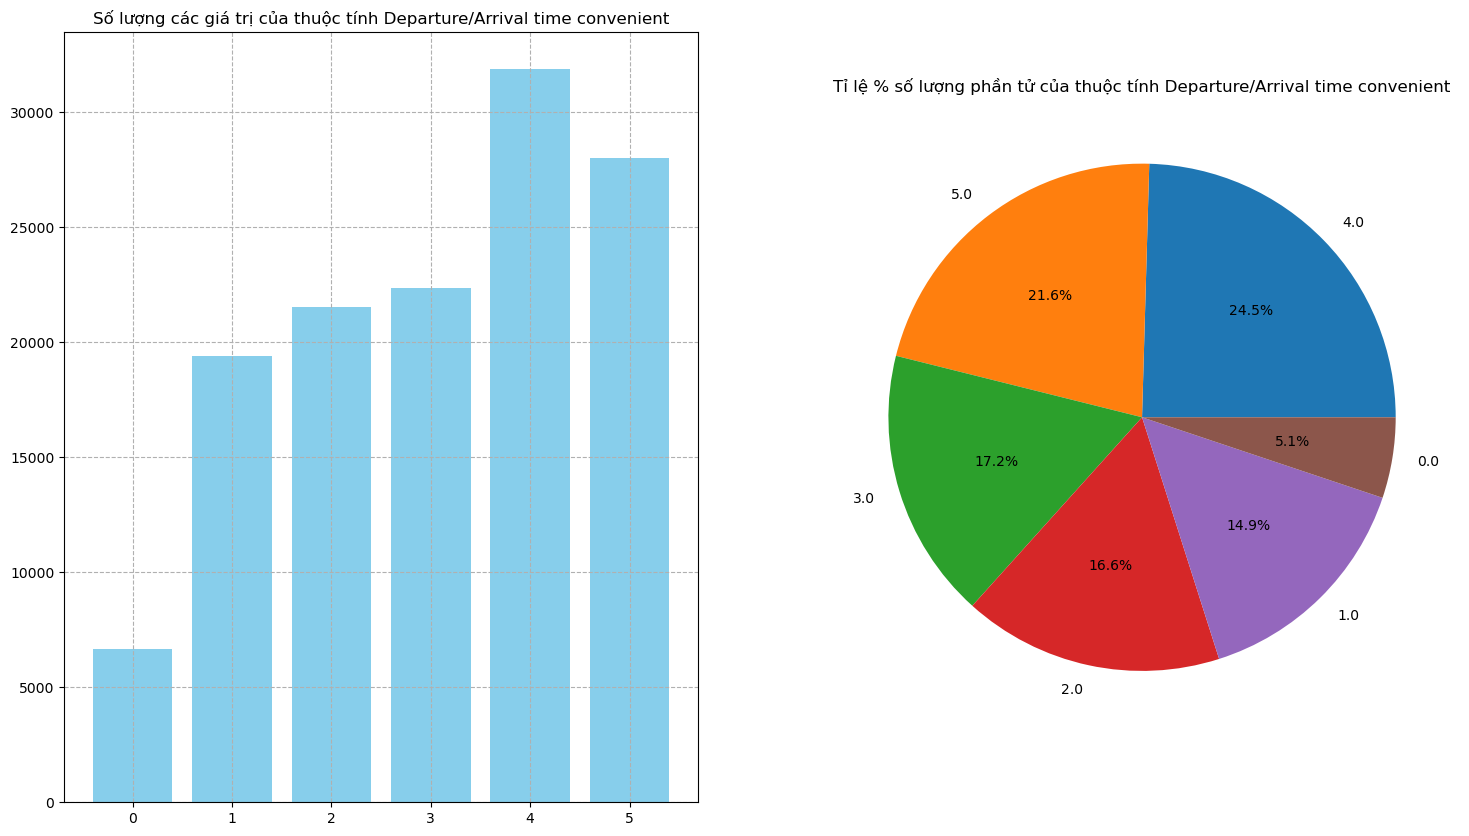

In [27]:
#Hiển thị số lượng và % các giá trị
tt(data['Departure/Arrival time convenient'])

#### Thuộc tính Ease of Online booking

Số lượng các giá trị của thuộc tính Ease of Online booking
3.0     30392
2.0     30054
4.0     24444
1.0     21885
5.0     17421
0.0      5682
50.0        1
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Ease of Online booking
3.0     0.234002
2.0     0.231400
4.0     0.188206
1.0     0.168503
5.0     0.134133
0.0     0.043748
50.0    0.000008
Name: proportion, dtype: float64


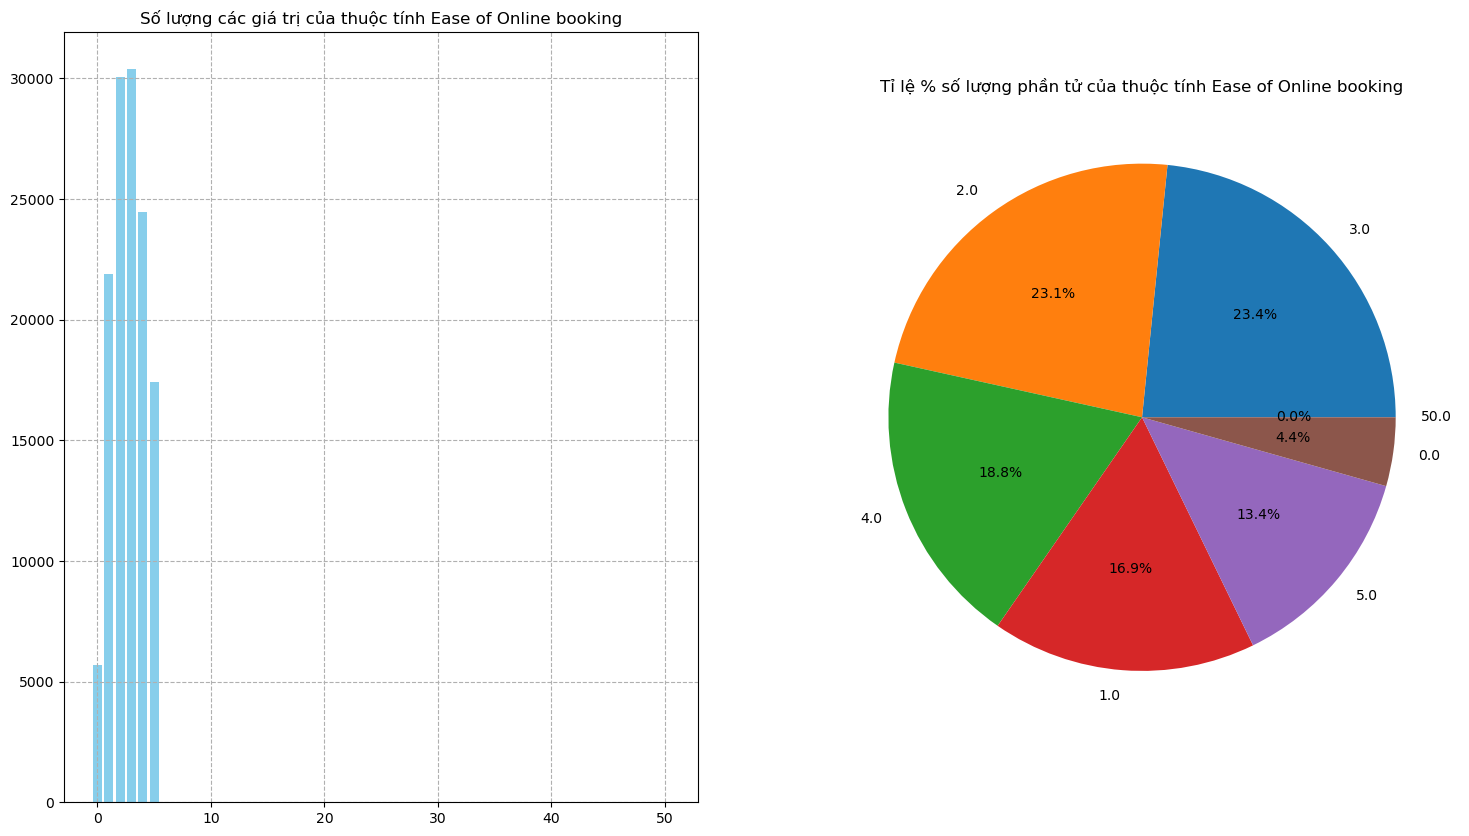

In [28]:
#Hiển thị số lượng và % các giá trị
tt(data['Ease of Online booking'])

#### Thuộc tính Food and drink

Số lượng các giá trị của thuộc tính Food and drink
2.0    27382
4.0    24983
3.0    23990
1.0    20897
5.0    17289
0.0    15338
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Food and drink
2.0    0.210827
4.0    0.192356
3.0    0.184710
1.0    0.160896
5.0    0.133116
0.0    0.118095
Name: proportion, dtype: float64


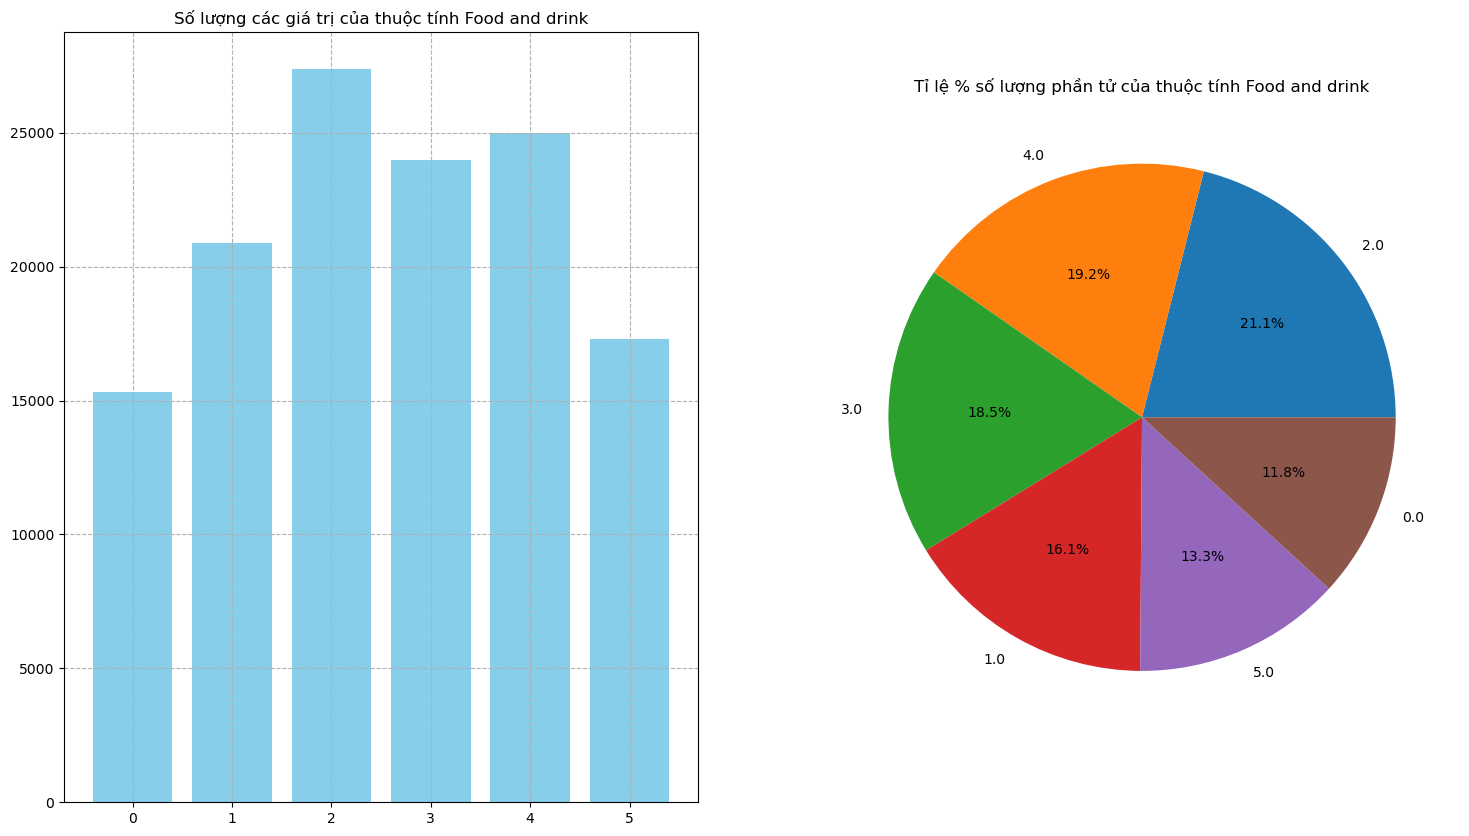

In [29]:
#Hiển thị số lượng và % các giá trị
tt(data['Food and drink'])

#### Thuộc tính Seat comfort

Số lượng các giá trị của thuộc tính Seat comfort
4.0    39755
5.0    33159
2.0    18529
3.0    16386
1.0    15108
0.0     6942
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Seat comfort
4.0    0.306093
5.0    0.255307
2.0    0.142664
3.0    0.126164
1.0    0.116324
0.0    0.053450
Name: proportion, dtype: float64


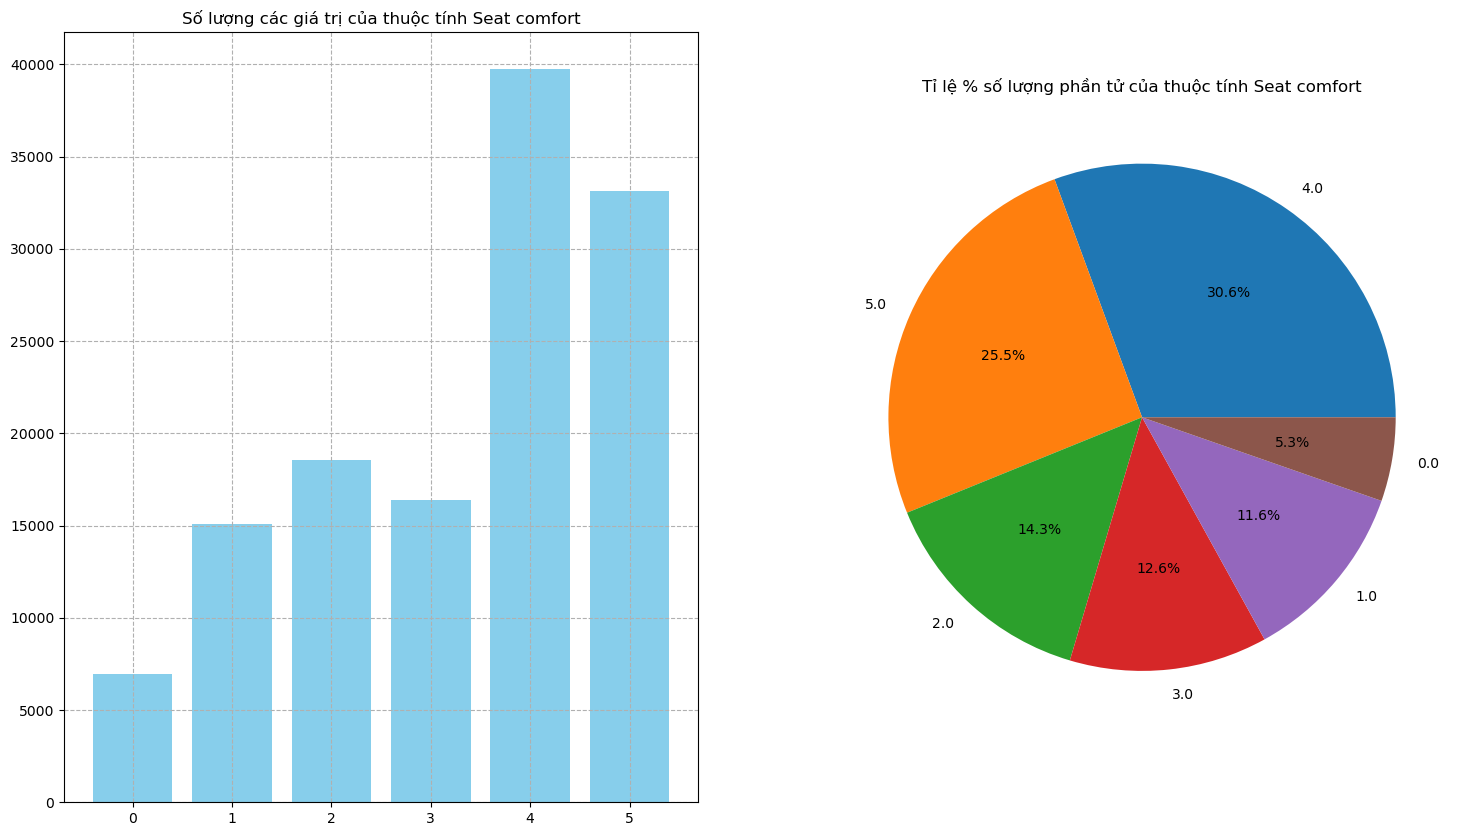

In [30]:
#Hiển thị số lượng và % các giá trị
tt(data['Seat comfort'])

#### Thuộc tính Inflight entertainment

Số lượng các giá trị của thuộc tính Inflight entertainment
4.0    36790
5.0    31542
3.0    23884
2.0    21967
1.0    15678
0.0       18
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Inflight entertainment
4.0    0.283264
5.0    0.242857
3.0    0.183894
2.0    0.169134
1.0    0.120712
0.0    0.000139
Name: proportion, dtype: float64


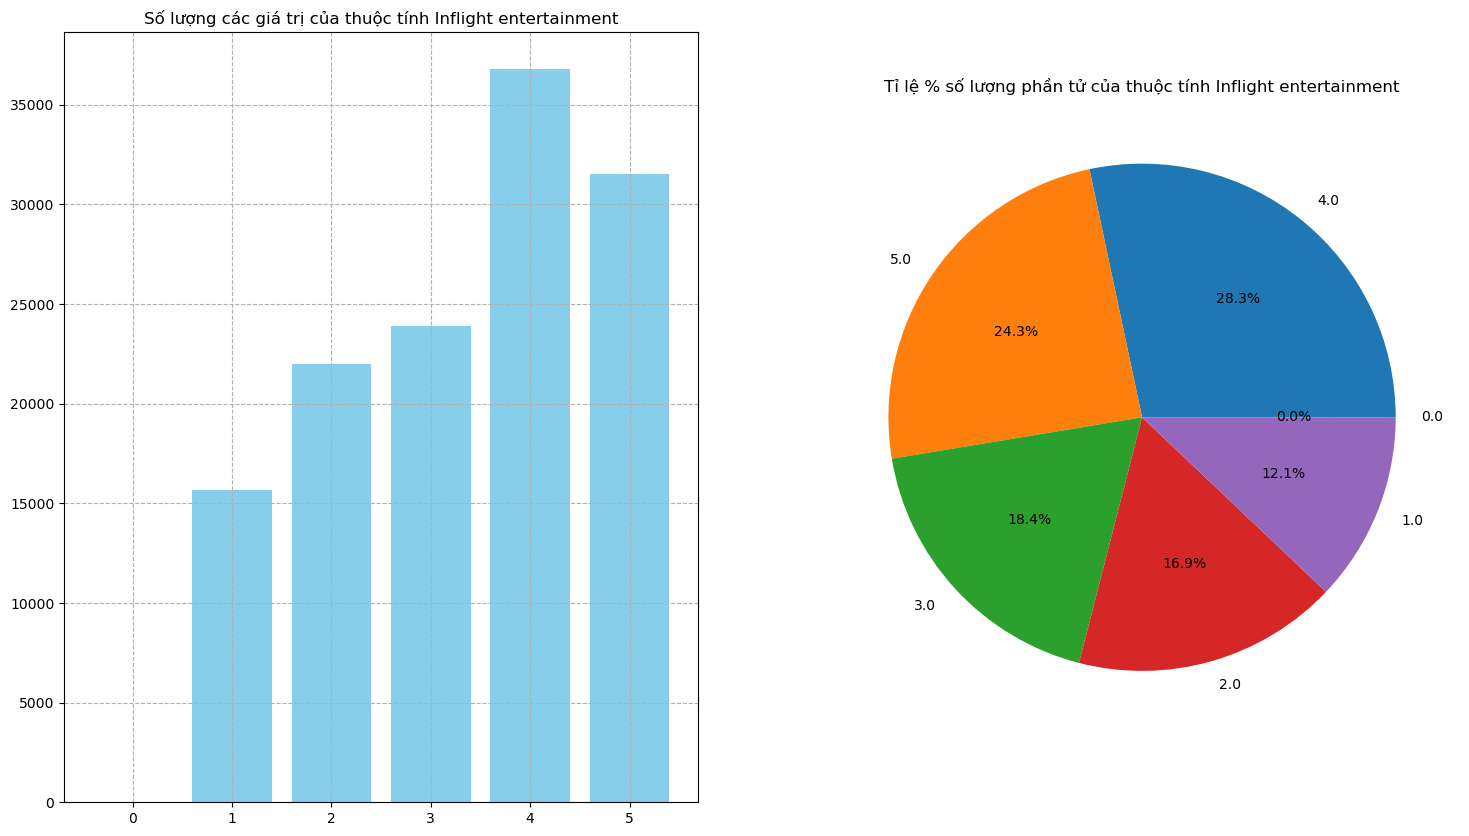

In [31]:
#Hiển thị số lượng và % các giá trị
tt(data['Inflight entertainment'])

#### Thuộc tính Baggage handling

Số lượng các giá trị của thuộc tính Baggage handling
1.0    28895
4.0    24336
5.0    23748
2.0    21822
3.0    19863
0.0    11215
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Baggage handling
1.0    0.222476
4.0    0.187374
5.0    0.182847
2.0    0.168018
3.0    0.152935
0.0    0.086350
Name: proportion, dtype: float64


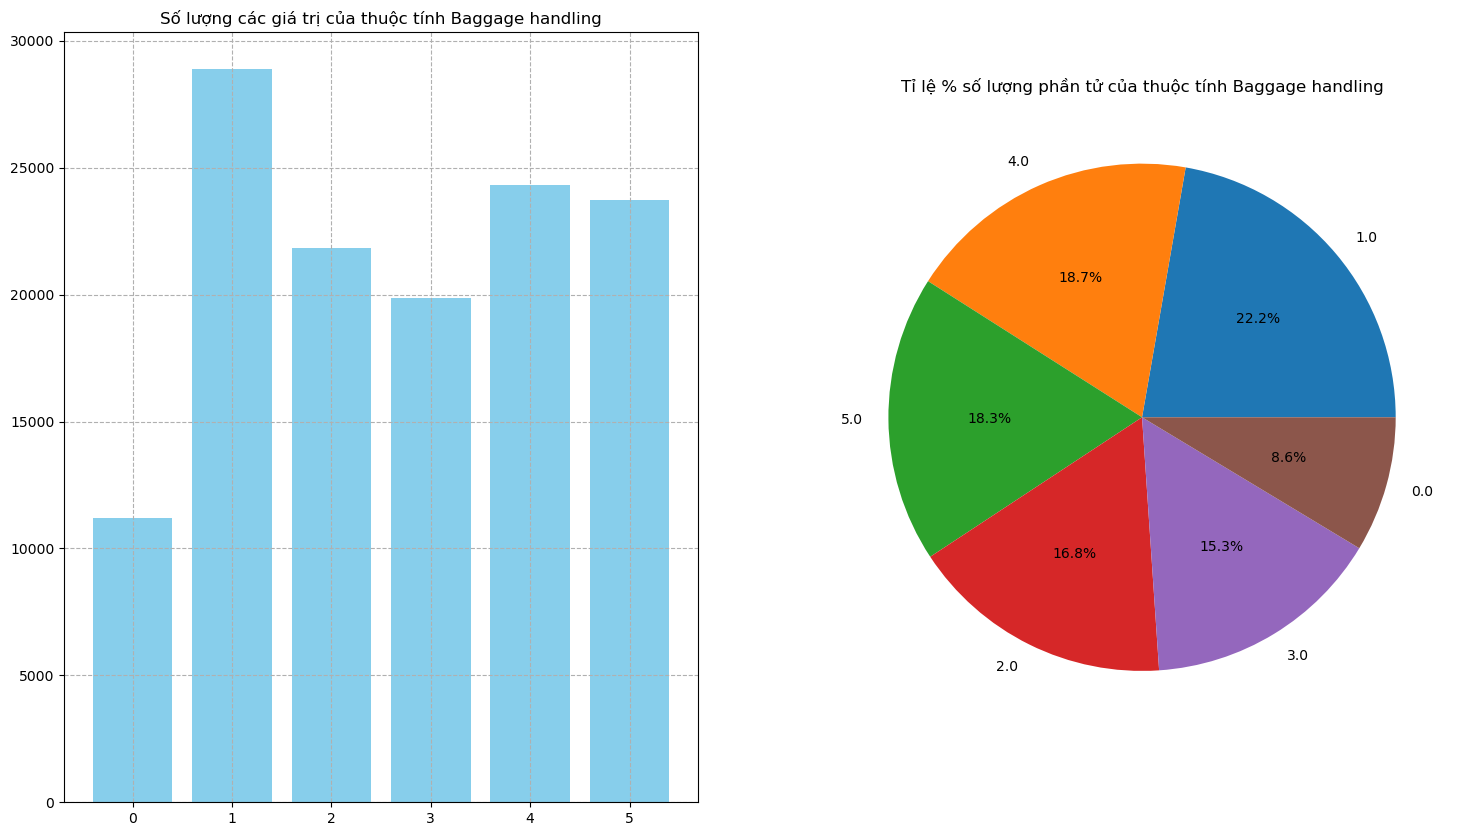

In [32]:
#Hiển thị số lượng và % các giá trị
tt(data['Baggage handling'])

#### Thuộc tính Checkin service

Số lượng các giá trị của thuộc tính Checkin service
3.0    27918
4.0    25659
1.0    20013
5.0    19691
2.0    19155
0.0    17443
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Checkin service
3.0    0.214954
4.0    0.197561
1.0    0.154090
5.0    0.151610
2.0    0.147483
0.0    0.134302
Name: proportion, dtype: float64


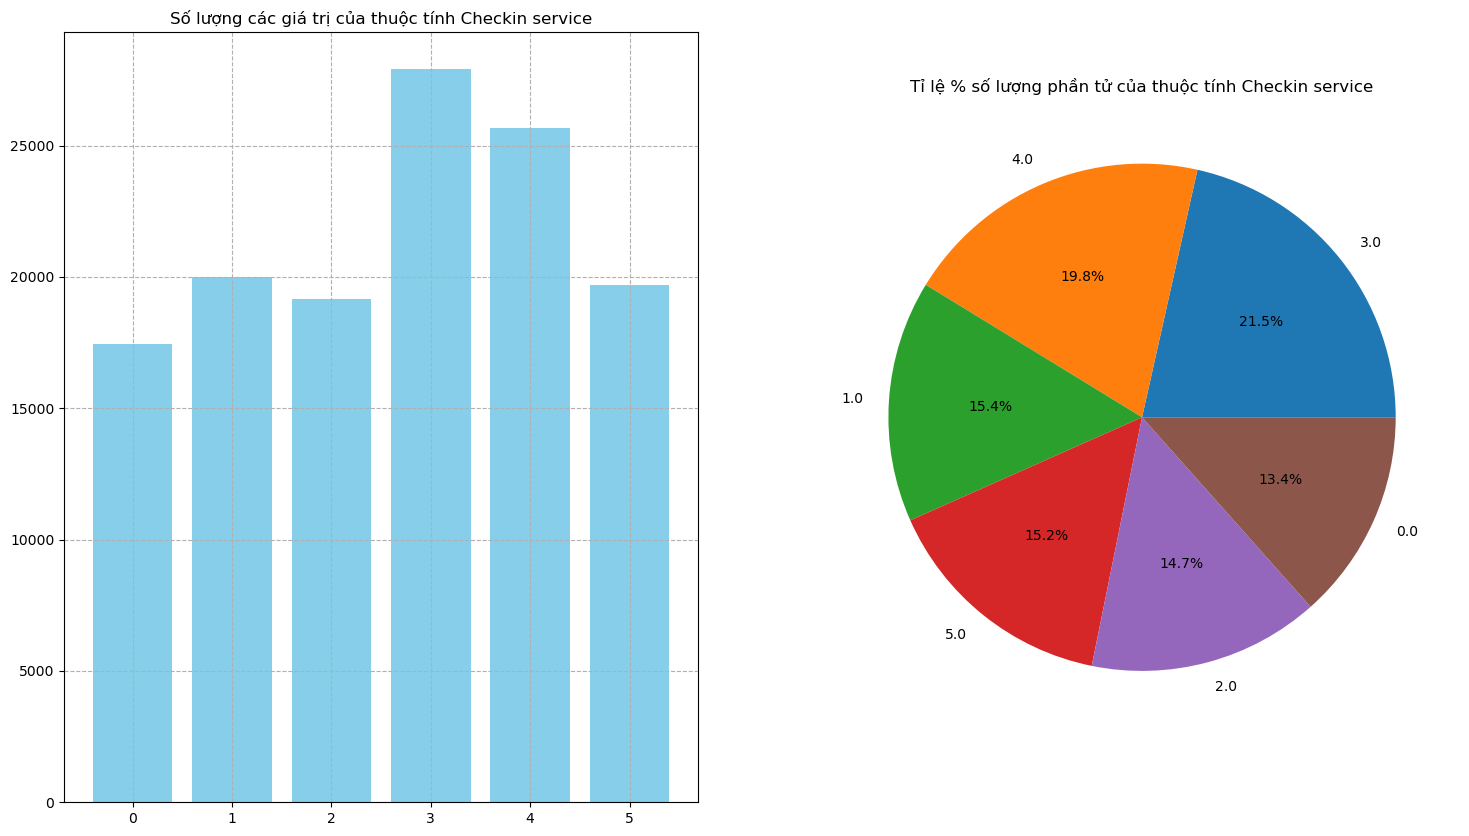

In [33]:
#Hiển thị số lượng và % các giá trị
tt(data['Checkin service'])

#### Thuộc tính Inflight service

Số lượng các giá trị của thuộc tính Inflight service
4.0    43554
5.0    34065
3.0    25316
2.0    14307
1.0     8864
0.0     3773
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Inflight service
4.0    0.335343
5.0    0.262283
3.0    0.194920
2.0    0.110156
1.0    0.068248
0.0    0.029050
Name: proportion, dtype: float64


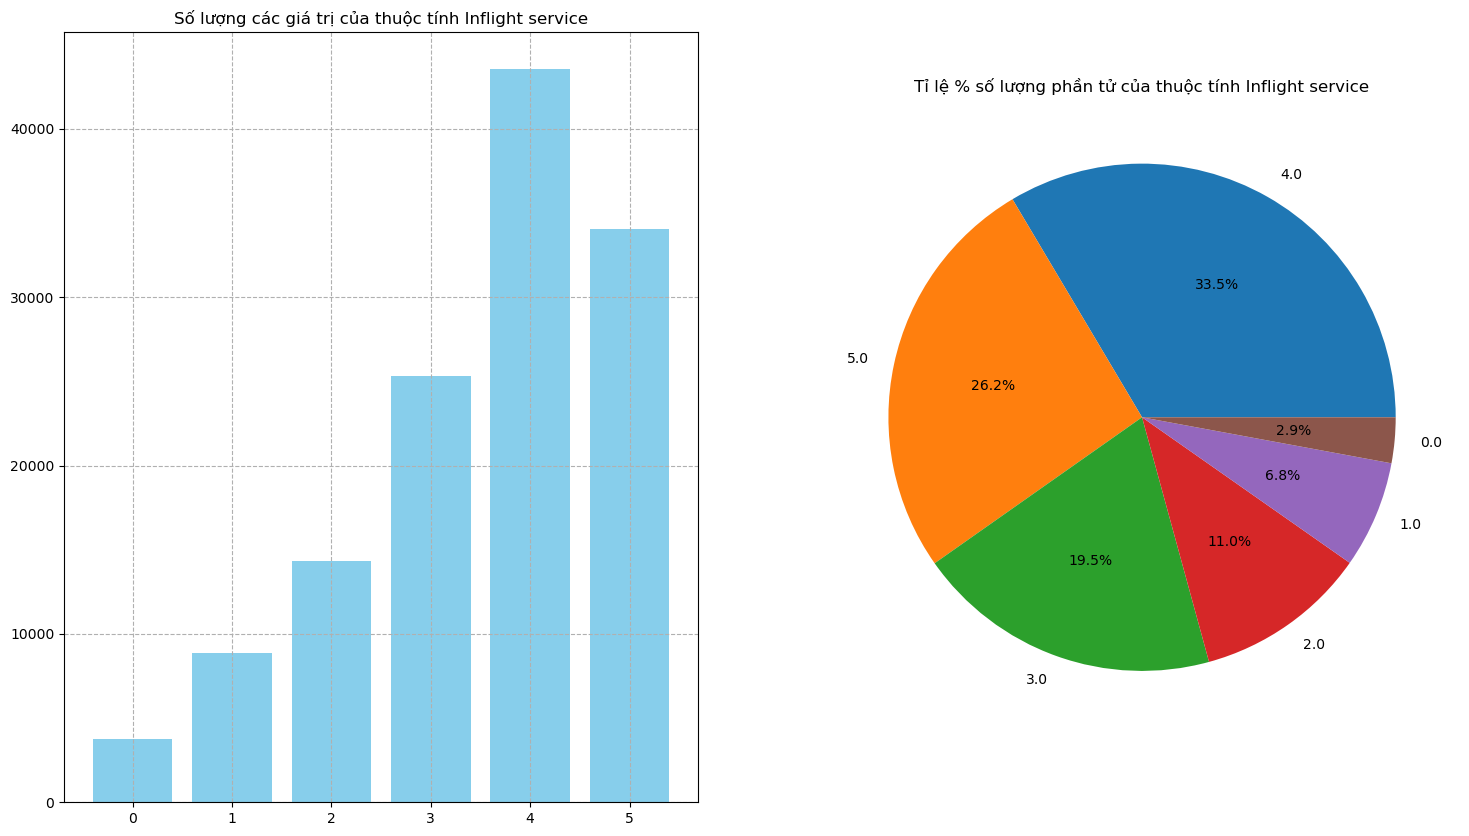

In [34]:
#Hiển thị số lượng và % các giá trị
tt(data['Inflight service'])

#### Thuộc tính Cleanliness

Số lượng các giá trị của thuộc tính Cleanliness
4.0    33969
5.0    30693
3.0    24038
2.0    20113
1.0    16729
0.0     4337
Name: count, dtype: int64
Tỉ lệ % số lượng phần tử Cleanliness
4.0    0.261543
5.0    0.236320
3.0    0.185080
2.0    0.154860
1.0    0.128805
0.0    0.033393
Name: proportion, dtype: float64


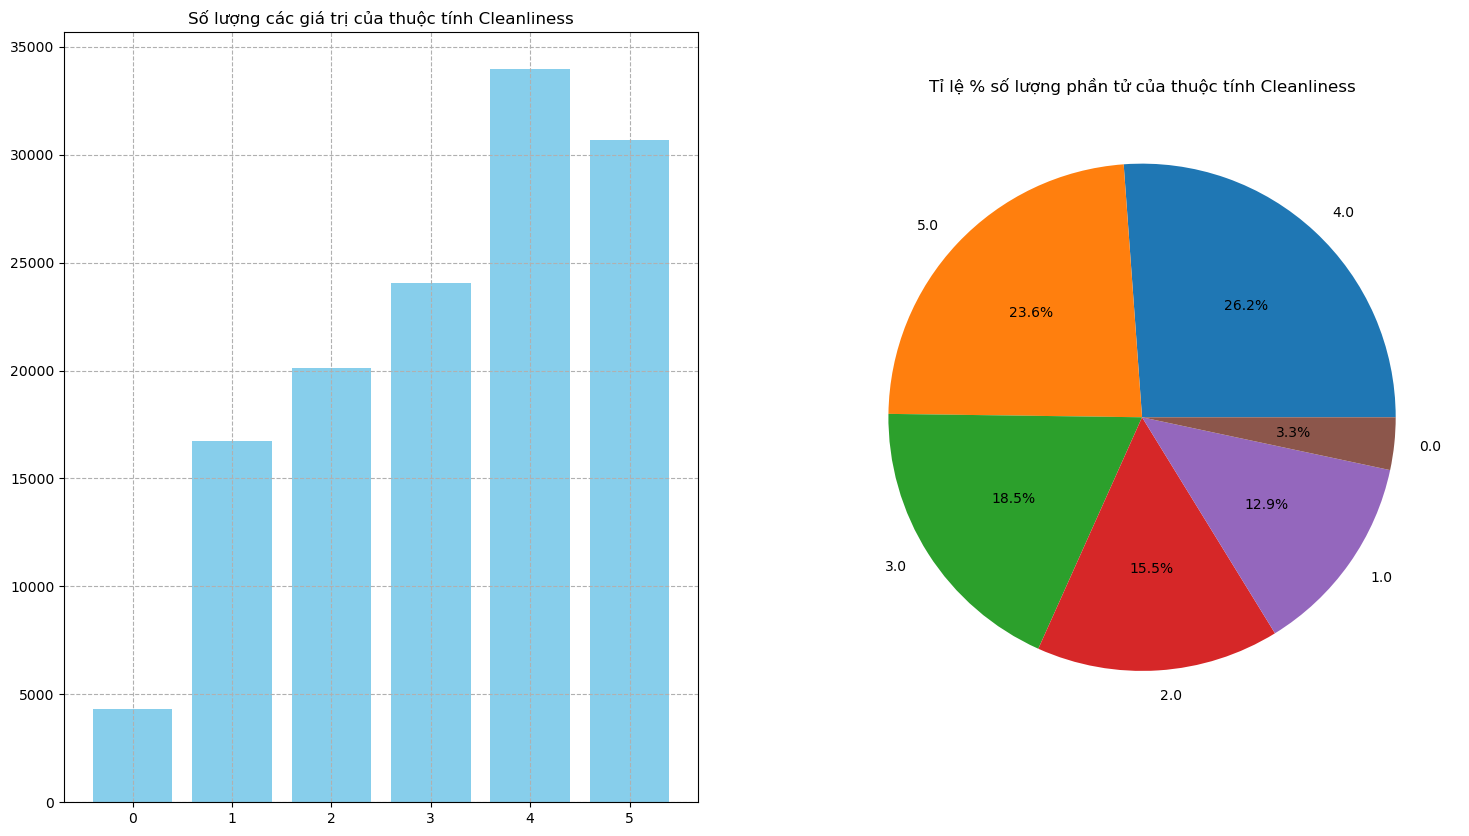

In [35]:
#Hiển thị số lượng và % các giá trị
tt(data['Cleanliness'])

### Hệ số tương quan

#### Flight Distance ~ Departure Delay in Minutes

1. Xác định hệ số tương quan (r) của 2 thuộc tính: Flight Distance ~ Departure Delay in Minutes, vẽ biểu đồ thể hiện sự tương quan; từ hệ số r và biểu đồ đưa ra nhận xét về mức độ tương quan của 2 thuộc tính này.

In [36]:
#Tính hệ số tương quan giữa các thuộc tính
corr1 = data['Flight Distance'].corr(data['Departure Delay in Minutes'])
print('Hệ số tương quan giữa Flight Distance và Departure Delay in Minutes:', corr1)

Hệ số tương quan giữa Flight Distance và Departure Delay in Minutes: 0.002404655646585694


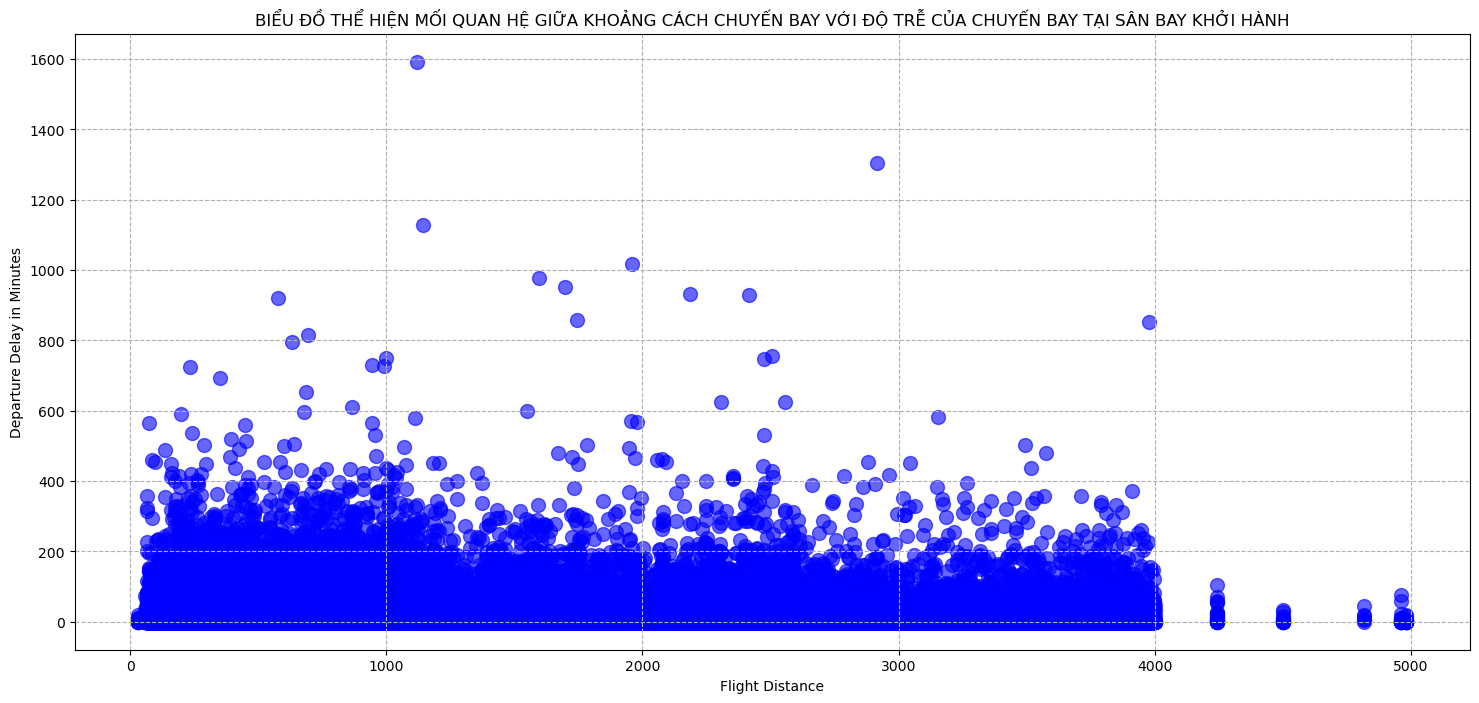

In [37]:
#Vẽ biểu đồ
plt.figure(figsize=(18,8))
plt.title('BIỂU ĐỒ THỂ HIỆN MỐI QUAN HỆ GIỮA KHOẢNG CÁCH CHUYẾN BAY VỚI ĐỘ TRỄ CỦA CHUYẾN BAY TẠI SÂN BAY KHỞI HÀNH')
plt.scatter(data['Flight Distance'], 
            data['Departure Delay in Minutes'], 
            color='blue',
            s=100,
            alpha=0.6,
            marker='o')
plt.grid(ls='--')
plt.xlabel('Flight Distance')
plt.ylabel('Departure Delay in Minutes')
plt.show()

**Nhận xét về mức độ tương quan**

Hệ số tương quan (r) giữa hai thuộc tính `Flight Distance` và `Departure Delay in Minutes` là 0.002. Điều này cho thấy rằng giữa khoảng cách chuyến bay và độ trễ của chuyến bay tại sân bay khởi hành có mối tương quan rất yếu.

Từ đó, có thể kết luận rằng khoảng cách chuyến bay không ảnh hưởng nhiều đến độ trễ của chuyến bay tại sân bay khởi hành.

#### Departure Delay in Minutes ~ Arrival Delay in Minutes

In [38]:
#Tính hệ số tương quan giữa các thuộc tính
corr2 = data['Arrival Delay in Minutes'].corr(data['Departure Delay in Minutes'])
print('Hệ số tương quan giữa Arrival Delay in Minutese và Departure Delay in Minutes:', corr2)

Hệ số tương quan giữa Arrival Delay in Minutese và Departure Delay in Minutes: 0.9652491146207016


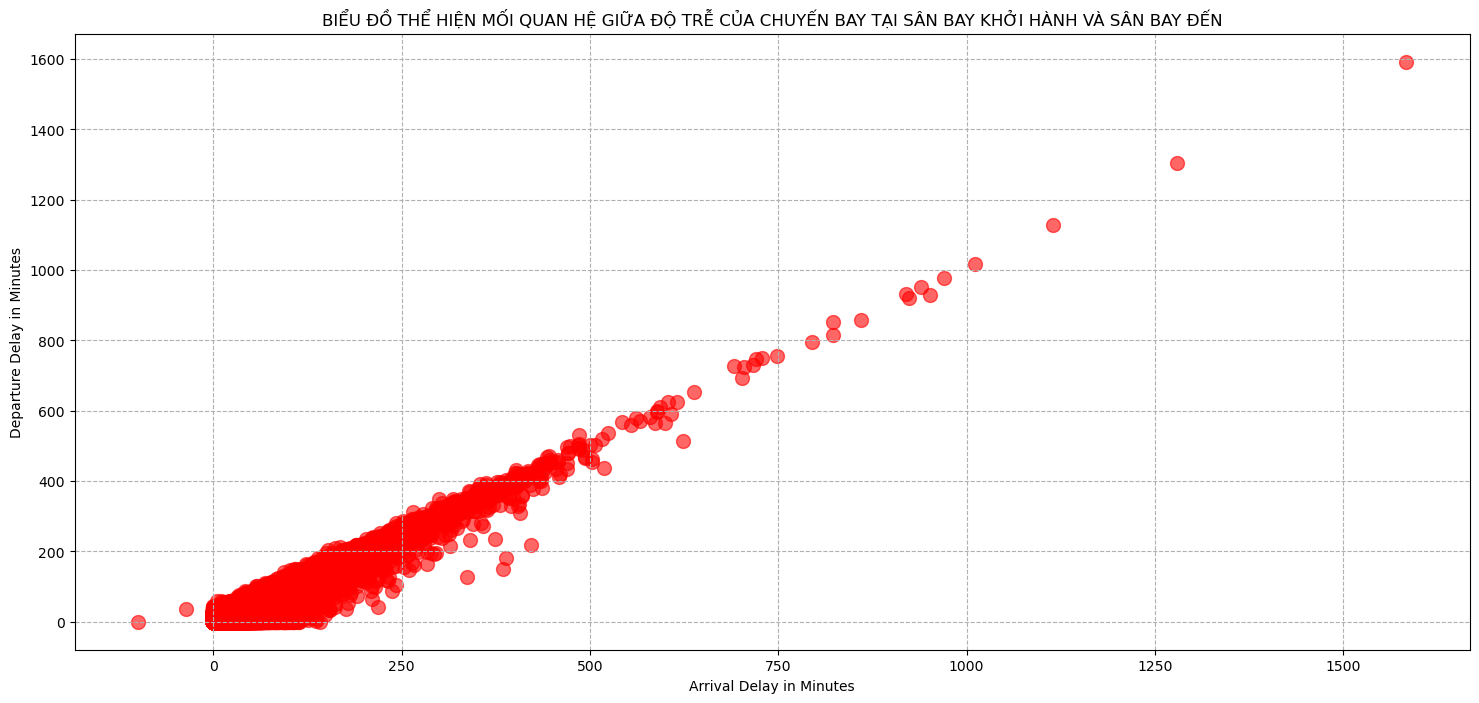

In [39]:
#Vẽ biểu đồ
plt.figure(figsize=(18,8))
plt.title('BIỂU ĐỒ THỂ HIỆN MỐI QUAN HỆ GIỮA ĐỘ TRỄ CỦA CHUYẾN BAY TẠI SÂN BAY KHỞI HÀNH VÀ SÂN BAY ĐẾN')
plt.scatter(data['Arrival Delay in Minutes'], 
            data['Departure Delay in Minutes'], 
            color='red',
            s=100,
            alpha=0.6,
            marker='o')
plt.grid(ls='--')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.show()

**Nhận xét về mức độ tương quan Departure Delay in Minutes ~ Arrival Delay in Minutes**

Hệ số tương quan (r) giữa hai thuộc tính `Departure Delay in Minutes` và `Arrival Delay in Minutes` là 0.9652. Điều này cho thấy rằng giữa độ trễ của chuyến bay tại sân bay khởi hành và độ trễ của chuyến bay tại sân bay đến có mối tương quan rất mạnh.

Từ đó, có thể kết luận rằng độ trễ của chuyến bay tại sân bay khởi hành ảnh hưởng rất lớn đến độ trễ của chuyến bay tại sân bay đến.

## 4. Làm sạch và chuẩn bị dữ liệu (Preparation)
---

1. Kiểm tra và xử lý các dữ liệu thiếu trong Dataset  (nếu có)
2. Kiểm tra và xử lý dữ liệu ngoại lai trong Dataset (nếu có)
3. Kiểm tra và xử lý dữ liệu trùng lặp trong Dataset (nếu có)
4. Theo quy định của ngành hàng không, các chuyến bay có thời gian khởi hành trễ hơn 15 phút so với lịch bay được tính là chuyến bay trễ (Delay). Dựa trên cột thời gian trễ của chuyến bay tại sân bay khởi hành (Departure Delay in Minutes), tạo thêm một cột mới đặt tên là “Delay” bằng cách rời rạc hóa dữ liệu của cột Departure Delay in Minutes về dạng dữ liệu nhị phân; nếu < 15 thành giá trị No, ngược lại >=15 thành Yes
5. Lưu tập dữ liệu đã xử lý ra file: Data_Airlines_OK.CSV

### 4.1 Phát hiện và xử lý dữ liệu thiếu (Missing Data)
---

In [40]:
data_clean = data.copy()

In [41]:
#Kiểm tra các dữ liệu thiếu
data_clean.isnull().sum()

Code                                     0
Gender                                   2
Customer Type                            2
Age                                      2
State                                70772
Type of Travel                           2
Class                                    2
Flight Distance                          2
Departure Delay in Minutes               2
Arrival Delay in Minutes               393
Inflight wifi service                    3
Departure/Arrival time convenient        3
Ease of Online booking                   3
Food and drink                           3
Seat comfort                             3
Inflight entertainment                   3
Baggage handling                         3
Checkin service                          3
Inflight service                         3
Cleanliness                              3
satisfaction                             3
dtype: int64

In [42]:
#Tính tỷ lệ thiếu của State
temp = data_clean['State'].isnull().sum()/len(data_clean['State'])
print('Tỷ lệ dữ liệu thiếu của State:', round(temp*100,2),'%')
#Do tỷ lệ thiếu dữ liệu của State cao(54.49%) nên ta sẽ xóa cột State

Tỷ lệ dữ liệu thiếu của State: 54.49 %


In [43]:
#Xoá cột State
data_clean = data_clean.drop('State', axis=1)

In [44]:
# Kiểm tra null thuộc tính Gender
data_clean[data_clean['Gender'].isnull()]

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
7227,JA98582364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86696,MD67424241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Ta thấy các dữ liệu thiếu là 2 đều ở 2 hành khách này*

In [45]:
#Kiểm tra thêm thuộc tính Inflight wifi service
data_clean[data_clean['Inflight wifi service'].isnull()]

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
1531,RB81219786,Male,Loyal Customer,39.0,Business travel,Business,733.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7227,JA98582364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86696,MD67424241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Ta thấy thêm 1 hành khách bị thiếu*

In [46]:
#Do dữ liệu bị thiếu nhiều ta xoá các dòng dữ liệu này(1531, 7227, 86696)
data_clean = data_clean.drop([1531, 7227, 86696])

*Như vậy chỉ còn thuộc tính Arrival Delay in Minutes bị thiếu ta tiến hành xử lí tiếp*

In [47]:
#Giá trị trung bình của cột Arrival Delay in Minutes
mean_arr_delay = data_clean['Arrival Delay in Minutes'].mean()
print('Giá trị trung bình của cột Arrival Delay in Minutes:', mean_arr_delay)

Giá trị trung bình của cột Arrival Delay in Minutes: 15.089590621597202


In [48]:
# Thay thế giá trị thiếu của cột 'Arrival Delay in Minutes' bằng giá trị trung bình
data_clean['Arrival Delay in Minutes'] = data_clean['Arrival Delay in Minutes'].fillna(mean_arr_delay)

In [49]:
#Kiểm tra lại dữ liệu sau khi xử lý
data_clean.isnull().sum()

Code                                 0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Seat comfort                         0
Inflight entertainment               0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
dtype: int64

### 4.2 Phát hiện và xử lý dữ liệu ngoại lai (Ouliers data)
---

In [50]:
#Quan sát thuộc tính số
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129879.0,39.443143,16.059034,7.0,27.0,40.0,51.0,1990.0
Flight Distance,129879.0,1190.302643,997.432758,31.0,414.0,844.0,1744.0,4983.0
Departure Delay in Minutes,129879.0,14.713995,38.071234,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,129879.0,15.089591,38.409150,-100.0,0.0,0.0,13.0,1584.0
Inflight wifi service,129879.0,2.386860,1.551949,0.0,1.0,2.0,4.0,5.0
Departure/Arrival time convenient,129879.0,3.057631,1.526746,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129879.0,2.757182,1.407816,0.0,2.0,3.0,4.0,50.0
Food and drink,129879.0,2.571686,1.568008,0.0,1.0,3.0,4.0,5.0
Seat comfort,129879.0,3.281046,1.528842,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129879.0,3.358002,1.334080,0.0,2.0,4.0,4.0,5.0


In [51]:
#Quan sát thuộc tính Object
data_clean.describe(include='O')

,Code,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129879,129879,129879,129879,129879,129879
unique,129875,2,2,2,3,2
top,CD24961940,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,4,65900,106099,89689,62157,73454


*Ta thấy có giá trị ngoại lai:*
 - max Age = 1990
 - min Arrival Delay in Minutes = -100
 - max Ease of Online booking = 50

#### Thuộc tính Age

In [52]:
#Kiểm tra Age > 100
data_clean[data_clean['Age'] > 100]

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
34456,YQ70032004,Female,Loyal Customer,1990.0,Business travel,Business,3042.0,9.0,3.0,1.0,1.0,1.0,2.0,4.0,5.0,5.0,4.0,5.0,3.0,satisfied


In [53]:
#Xoá bản ghi có giá trị Age > 100
data_clean = data_clean.drop(34456)

#### Thuộc tính Arrival Delay in Minutes

In [54]:
#Kiểm tra Arrival Delay in Minutes < 0
data_clean[data_clean['Arrival Delay in Minutes'] < 0]

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
58362,SR03522673,Female,Loyal Customer,50.0,Personal Travel,Eco,1046.0,36.0,-36.0,3.0,4.0,3.0,4.0,4.0,4.0,2.0,3.0,4.0,5.0,neutral or dissatisfied
64268,YW72185494,Female,Disloyal Customer,28.0,Business travel,Business,1726.0,0.0,-100.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,satisfied


In [55]:
#Lỗi có thể do đánh máy ta tiến hành chuyển giá trị âm thành dương
data_clean['Arrival Delay in Minutes'] = data_clean['Arrival Delay in Minutes'].abs()

#### Thuộc tính Ease of Online booking

In [56]:
#Kiểm tra thuộc tính Ease of Online booking có giá trị lớn hơn 5
data_clean[data_clean['Ease of Online booking'] > 5]

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
53677,UE73704037,Male,Disloyal Customer,26.0,Business travel,Business,226.0,0.0,2.0,5.0,2.0,50.0,1.0,1.0,1.0,5.0,3.0,4.0,1.0,satisfied


In [57]:
#Thay thế giá trị 50 thành 5
data_clean['Ease of Online booking'].loc[53677] = 5

In [58]:
#Kiểm tra lại dữ liệu sau khi xử lý
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129878.0,39.428125,15.119521,7.0,27.0,40.0,51.0,85.0
Flight Distance,129878.0,1190.288386,997.423364,31.0,414.0,844.0,1744.0,4983.0
Departure Delay in Minutes,129878.0,14.714039,38.071377,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,129878.0,15.091778,38.408460,0.0,0.0,0.0,13.0,1584.0
Inflight wifi service,129878.0,2.386871,1.551950,0.0,1.0,2.0,4.0,5.0
Departure/Arrival time convenient,129878.0,3.057646,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129878.0,2.756849,1.401710,0.0,2.0,3.0,4.0,5.0
Food and drink,129878.0,2.571690,1.568013,0.0,1.0,3.0,4.0,5.0
Seat comfort,129878.0,3.281041,1.528846,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129878.0,3.357990,1.334078,0.0,2.0,4.0,4.0,5.0


### 4.3 Phát hiện và xử lý dữ liệu trung lặp (Duplicate data)
---

In [59]:
#Kiểm tra trùng lặp của data
data_clean.duplicated().sum()

4

In [60]:
#Hiển thị các bản ghi trùng lặp
data_clean[data_clean.duplicated()]

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
6,CD24961940,Female,Loyal Customer,49.0,Personal Travel,Eco,577.0,23.0,2.0,0.0,5.0,2.0,0.0,5.0,1.0,1.0,0.0,1.0,5.0,neutral or dissatisfied
7,CD24961940,Female,Loyal Customer,49.0,Personal Travel,Eco,577.0,23.0,2.0,0.0,5.0,2.0,0.0,5.0,1.0,1.0,0.0,1.0,5.0,neutral or dissatisfied
8,CD24961940,Female,Loyal Customer,49.0,Personal Travel,Eco,577.0,23.0,2.0,0.0,5.0,2.0,0.0,5.0,1.0,1.0,0.0,1.0,5.0,neutral or dissatisfied
84753,EP96816170,Female,Disloyal Customer,39.0,Business travel,Business,255.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,3.0,4.0,2.0,neutral or dissatisfied


In [61]:
#Xoá các bản ghi trùng lặp giữ lại bản đầu tiên
data_clean = data_clean.drop_duplicates(keep='first')

### 4.4 Rời rạc hóa dữ liệu
---

In [62]:
#Rời rạc cột Departure Delay in Minutes
def check_delay(x):
    if x < 15:
        return 'No'
    else:
        return 'Yes'

In [63]:
#Rời rạc và lưu vaò cột Delay
data_clean['Delay'] = data_clean['Departure Delay in Minutes'].apply(lambda x: check_delay(x))
data_clean.sample(5)

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Delay
21945,UX04565216,Male,Loyal Customer,32.0,Personal Travel,Eco,721.0,20.0,9.0,2.0,...,2.0,0.0,4.0,4.0,0.0,2.0,2.0,4.0,neutral or dissatisfied,Yes
69343,RW80263314,Male,Loyal Customer,21.0,Personal Travel,Eco,1290.0,0.0,0.0,1.0,...,0.0,1.0,3.0,5.0,2.0,3.0,5.0,5.0,neutral or dissatisfied,No
73414,AV25890285,Male,Loyal Customer,23.0,Personal Travel,Eco,596.0,0.0,0.0,2.0,...,2.0,1.0,5.0,5.0,2.0,1.0,3.0,5.0,neutral or dissatisfied,No
123986,VX68050600,Female,Loyal Customer,40.0,Personal Travel,Eco,562.0,41.0,42.0,3.0,...,3.0,1.0,1.0,1.0,2.0,1.0,5.0,1.0,neutral or dissatisfied,Yes
121492,MJ17953700,Male,Loyal Customer,34.0,Business travel,Business,3250.0,0.0,0.0,1.0,...,1.0,4.0,1.0,4.0,5.0,3.0,4.0,3.0,satisfied,No


### 4.5 Lưu dữ liệu
---

In [64]:
#Lưu dữ liệu đã xử lý xong
data_clean.to_csv('Data/Data_Airlines_OK.csv', index=False)

**Mô tả dữ liệu sau khi đã xử lý**
1. Code: Mã hành khách
2. Gender: Giới tính của hành khách (Male|Female)
3. Customer Type: Loại hành khách. 
    * Khách hàng thân thiết (Loyal Customer): Khách hàng đã đi nhiều lần (>=2) với hãng
    * Khách hàng không thân thiết (disloyal Customer): Khách hàng không thân thiết (sử dụng dịch vụ bay lần đầu của hãng)
4. Age: Tuổi của hành khách
6. Type of Travel: Mục đích đi máy bay
    * Đi với mục đích công việc (Business travel)
    * Đi với mục đích cá nhân (Personal Travel)
7. Class: Loại vé (Business | Eco Plus | Eco)
8. Flight Distance: Khoảng cách di chuyển của chuyến bay (Mile)
9. Departure Delay in Minutes: Thời gian trễ của chuyến bay tại ga xuất phát (Phút)
10. Arrival Delay in Minutes: Thời gian trễ của chuyến bay tại ga đến (phút)
11. Inflight wifi service: Dịch vụ wifi trên chuyến bay
12. Departure/Arrival time convenient: Mức độ thuận tiện trong thời gian ở Ga khởi hành| Ga đến
13. Ease of Online booking: Mức độ dễ đàng khi đặt vé Online
14. Food and drink: Đồ ăn và đồ uống phục vụ trên chuyến bay
15. Seat comfort: Sự thoải mái của chỗ ngồi
16. Inflight entertainment: Dịch vụ giải trí trên chuyến bay
17. Baggage handling: Vấn đề liên quan đến hành lý xách tay
18. Checkin service: Dịch vụ checkin
19. Inflight service: Dịch vụ trên chuyến bay
20. Cleanliness: Vệ sinh trên chuyến bay
21. satisfaction: Tổng quan chung về mức độ hài lòng.
    * KHÔNG HÀI LÒNG với chuyến bay (neutral or dissatisfied)
    * HÀI LÒNG với chuyến bay (satisfied)
21. Delay: Chuyến bay có được coi là chuyến bay trễ hay không
    * Yes: Chuyến bay bị trễ(Departure Delay in Minutes >= 15)
    * No: Chuyến bay không trễ (Departure Delay in Minutes < 15)